# **MScFE622: Stochastic Modelling**
## **Group Work Project #3**
### **Group Number: 4209**

# **Introduction**


This group work project 3 (GWP3) our primary focus is to apply reinforcement learning techniques to aid in portfolio selection. The process of portfolio selection involves selecting a portfolio which optimizes the  expected returns objective consistent with the investors level of risk acceptance. In this GWP will also make reference to https://royalsocietypublishing.org/doi/full/10.1098/rsos.171377 a paper which elaborates more on the application of a risk-aware multi-armed bandit problem to minimize risk and maximise return.

# **Step 2: Pseudocode that illustrating the Steps in Model 1: Sequential Portfolio Selection Problem (from the Huo paper).**

# **Step 3: Data Collection**

**3a. Team member A data collected from 15 financial institutions**

- Two tickers have been delisted i.e., BBT and STI therefore they have been removed from the analysis to avoid nan values.

In [ ]:
#Import necessary libraries
import yfinance as yf

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from numpy.random import rand, seed


import pandas_datareader as web
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn


tickers = ["JPM", "WFC", "BAC", "C", "GS","USB", "MS", "KEY", "PNC", "COF", "AXP", "PRU", "SCHW"]
start=datetime(2008, 9, 1)
end=datetime(2008, 10, 31)
fin_data = yf.download(tickers, start, end)["Adj Close"]
fin_data.head()

[*********************100%%**********************]  13 of 13 completed


,AXP,BAC,C,COF,GS,JPM,KEY,MS,PNC,PRU,SCHW,USB,WFC
Date,,,,,,,,,,,,,
2008-09-02,31.773911,25.531290,148.928238,34.988815,129.483002,26.480579,8.322875,30.126413,49.117027,44.671410,19.997488,21.174292,20.872435
2008-09-03,31.992882,26.305445,152.824875,35.565228,131.276596,26.969576,8.395537,30.761028,49.571815,45.859718,20.022295,21.553698,20.738684
2008-09-04,30.303703,24.421921,142.615723,33.750347,126.021156,25.747084,7.873706,29.426132,48.655540,44.394520,19.484730,20.703320,19.842533
2008-09-05,30.812019,25.722836,148.616455,34.825249,127.853935,26.894871,8.567284,30.170174,49.685524,45.421310,19.923058,21.416317,20.865755
2008-09-08,31.687897,27.718092,158.358017,37.956497,132.937073,28.219244,9.075901,31.563446,51.350834,48.986275,20.857578,22.201281,22.444063


**3a. Team member B data collected from 15 non-financial institutions**

- For non-financial institutions one ticker has been delisted from yahoo "HCP".


In [ ]:
ticker = ["KR", "PFE", "XOM", "WMT", "DAL", "CSCO", "EQIX", "DUK", "NFLX", "GE", "APA", "F", "REGN", "CMS"]
start="2008-09-01"
end="2008-10-31"
non_fin = yf.download(ticker, start, end)["Adj Close"]
non_fin.head()

[*********************100%%**********************]  14 of 14 completed


,APA,CMS,CSCO,DAL,DUK,EQIX,F,GE,KR,NFLX,PFE,REGN,WMT,XOM
Date,,,,,,,,,,,,,,
2008-09-02,84.531807,8.152998,16.363983,8.105466,26.190983,63.139462,2.665931,115.751549,10.590403,4.405714,10.190772,20.580000,42.738354,44.533031
2008-09-03,85.437981,8.057149,16.060814,8.052429,25.858681,62.515488,2.701398,115.913895,10.586595,4.415714,10.206717,21.799999,42.838650,44.936188
2008-09-04,87.465073,8.069133,15.351134,7.919844,26.115452,60.448521,2.594997,112.384071,10.380879,4.267143,9.924970,20.379999,42.831505,43.853413
2008-09-05,88.577934,7.991254,15.337359,7.787255,26.145651,60.440720,2.606820,113.114380,10.236118,4.237143,9.839914,19.070000,43.519325,43.553894
2008-09-08,87.258354,8.236862,16.102167,7.592797,26.991508,60.456329,2.689576,118.023643,10.399928,4.307143,10.174823,18.900000,44.422096,44.216244


**3a. Team member C: Combining the two data series and calculating returns**


In [ ]:
# Define tickers

all_tickers = ['JPM', 'WFC', 'BAC', 'C', 'GS', 'USB', 'MS', 'KEY', 'PNC', 'COF', 'AXP', 'PRU', 'SCHW', 'KR',
           'PFE', 'XOM', 'WMT', 'DAL', 'CSCO', 'EQIX', 'DUK', 'NFLX', 'GE', 'APA', 'F', 'REGN', 'CMS']


#combining the two datasets and collecting the adjusted closing prices only
dataset = yf.download(all_tickers, start="2008-09-01", end="2008-10-31")["Adj Close"]
combined_data=student_df = pd.DataFrame(dataset)
combined_data.index = pd.to_datetime(dataset.index, format='%Y%m%d')
combined_data.head()



[*********************100%%**********************]  27 of 27 completed


,APA,AXP,BAC,C,CMS,COF,CSCO,DAL,DUK,EQIX,...,NFLX,PFE,PNC,PRU,REGN,SCHW,USB,WFC,WMT,XOM
Date,,,,,,,,,,,,,,,,,,,,,
2008-09-02,84.531815,31.773918,25.531290,148.928207,8.152996,34.988808,16.363985,8.105468,26.190981,63.139469,...,4.405714,10.190772,49.117020,44.671413,20.580000,19.997490,21.174292,20.872440,42.738365,44.533016
2008-09-03,85.438019,31.992891,26.305443,152.824890,8.057150,35.565228,16.060818,8.052431,25.858677,62.515480,...,4.415714,10.206717,49.571808,45.859737,21.799999,20.022289,21.553692,20.738686,42.838661,44.936214
2008-09-04,87.465034,30.303705,24.421932,142.615738,8.069131,33.750343,15.351142,7.919844,26.115444,60.448524,...,4.267143,9.924967,48.655556,44.394524,20.379999,19.484730,20.703323,19.842531,42.831497,43.853405
2008-09-05,88.577950,30.812025,25.722830,148.616501,7.991258,34.825249,15.337359,7.787258,26.145670,60.440727,...,4.237143,9.839917,49.685532,45.421318,19.070000,19.923065,21.416327,20.865753,43.519314,43.553898
2008-09-08,87.258362,31.687895,27.718088,158.357986,8.236863,37.956478,16.102158,7.592796,26.991501,60.456341,...,4.307143,10.174824,51.350834,48.986271,18.900000,20.857594,22.201281,22.444061,44.422096,44.216248


In [ ]:
combined_data.tail()

,APA,AXP,BAC,C,CMS,COF,CSCO,DAL,DUK,EQIX,...,NFLX,PFE,PNC,PRU,REGN,SCHW,USB,WFC,WMT,XOM
Date,,,,,,,,,,,,,,,,,,,,,
2008-10-24,55.518623,18.903883,16.816017,94.609581,6.020400,27.495665,11.237749,7.345304,23.608131,41.338993,...,2.707143,8.808610,39.757874,19.878315,16.150000,13.472252,19.498919,20.671810,36.827343,39.764103
2008-10-27,51.265137,18.141439,16.385040,91.414352,5.792761,26.794641,11.086167,6.770759,23.744068,40.301624,...,2.562857,8.712921,39.589066,18.603472,15.460000,12.843714,19.081799,20.618307,35.587826,38.065033
2008-10-28,56.952419,20.020042,18.372314,104.506912,6.152188,31.078676,12.615769,7.212715,25.194094,44.388718,...,2.938571,9.473112,44.187424,21.055092,16.750000,14.638362,20.406004,23.045958,39.528496,43.116173
2008-10-29,59.588963,19.815674,17.813635,100.610336,6.092284,29.481899,12.312601,7.062450,24.529495,46.494667,...,3.108571,9.138204,42.418308,20.334028,17.430000,14.431603,19.220842,21.474335,39.421024,42.995224
2008-10-30,62.886616,20.483795,18.180767,103.451065,6.313932,29.692213,12.257485,8.441354,25.420650,48.865810,...,3.254286,9.494374,43.532425,16.653721,18.139999,15.333065,19.068552,21.293776,39.227566,43.225597


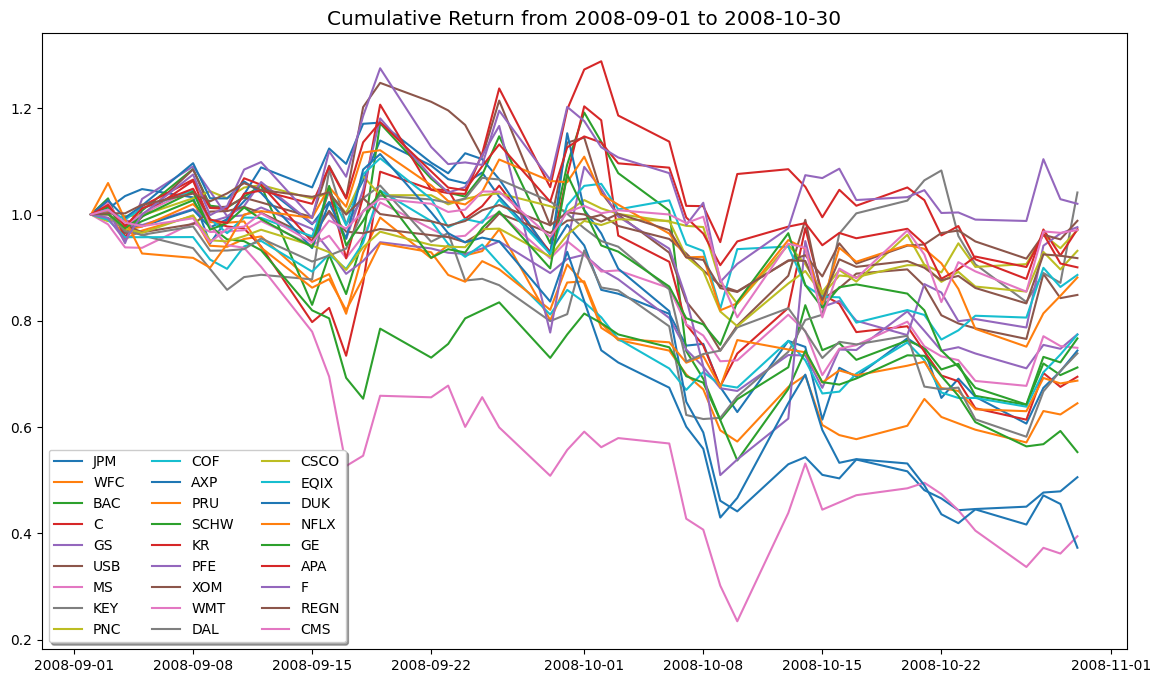

In [ ]:
plt.plot(combined_data.index, combined_data.values/combined_data.values[0,:], label=all_tickers)
title = 'Cumulative Return from 2008-09-01 to 2008-10-30'
plt.title(title, fontsize='x-large')
#plt.xlim([datetime.date(2008, 9, 1), datetime.date(2008, 10, 31)])
fig = plt.gcf()
fig.set_size_inches(14,8)
plt.legend(loc='lower left',
          ncol=3, fancybox=True, shadow=True);

Calculating Returns

In [ ]:
#computing Returns
returns = dataset.pct_change()
returns.fillna(0, inplace=True)
returns.head()

,APA,AXP,BAC,C,CMS,COF,CSCO,DAL,DUK,EQIX,...,NFLX,PFE,PNC,PRU,REGN,SCHW,USB,WFC,WMT,XOM
Date,,,,,,,,,,,,,,,,,,,,,
2008-09-02,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2008-09-03,0.010720,0.006892,0.030322,0.026165,-0.011756,0.016474,-0.018526,-0.006543,-0.012688,-0.009883,...,0.002270,0.001565,0.009259,0.026601,0.059281,0.001240,0.017918,-0.006408,0.002347,0.009054
2008-09-04,0.023725,-0.052799,-0.071602,-0.066803,0.001487,-0.051030,-0.044187,-0.016466,0.009930,-0.033063,...,-0.033646,-0.027604,-0.018483,-0.031950,-0.065138,-0.026848,-0.039453,-0.043212,-0.000167,-0.024097
2008-09-05,0.012724,0.016774,0.053268,0.042076,-0.009651,0.031849,-0.000898,-0.016741,0.001157,-0.000129,...,-0.007030,-0.008569,0.021169,0.023129,-0.064279,0.022496,0.034439,0.051567,0.016059,-0.006830
2008-09-08,-0.014897,0.028426,0.077568,0.065548,0.030734,0.089913,0.049865,-0.024972,0.032351,0.000258,...,0.016521,0.034036,0.033517,0.078486,-0.008915,0.046907,0.036652,0.075641,0.020744,0.015208


 **Step 4: Correlation Matrix**

<Figure size 640x480 with 0 Axes>

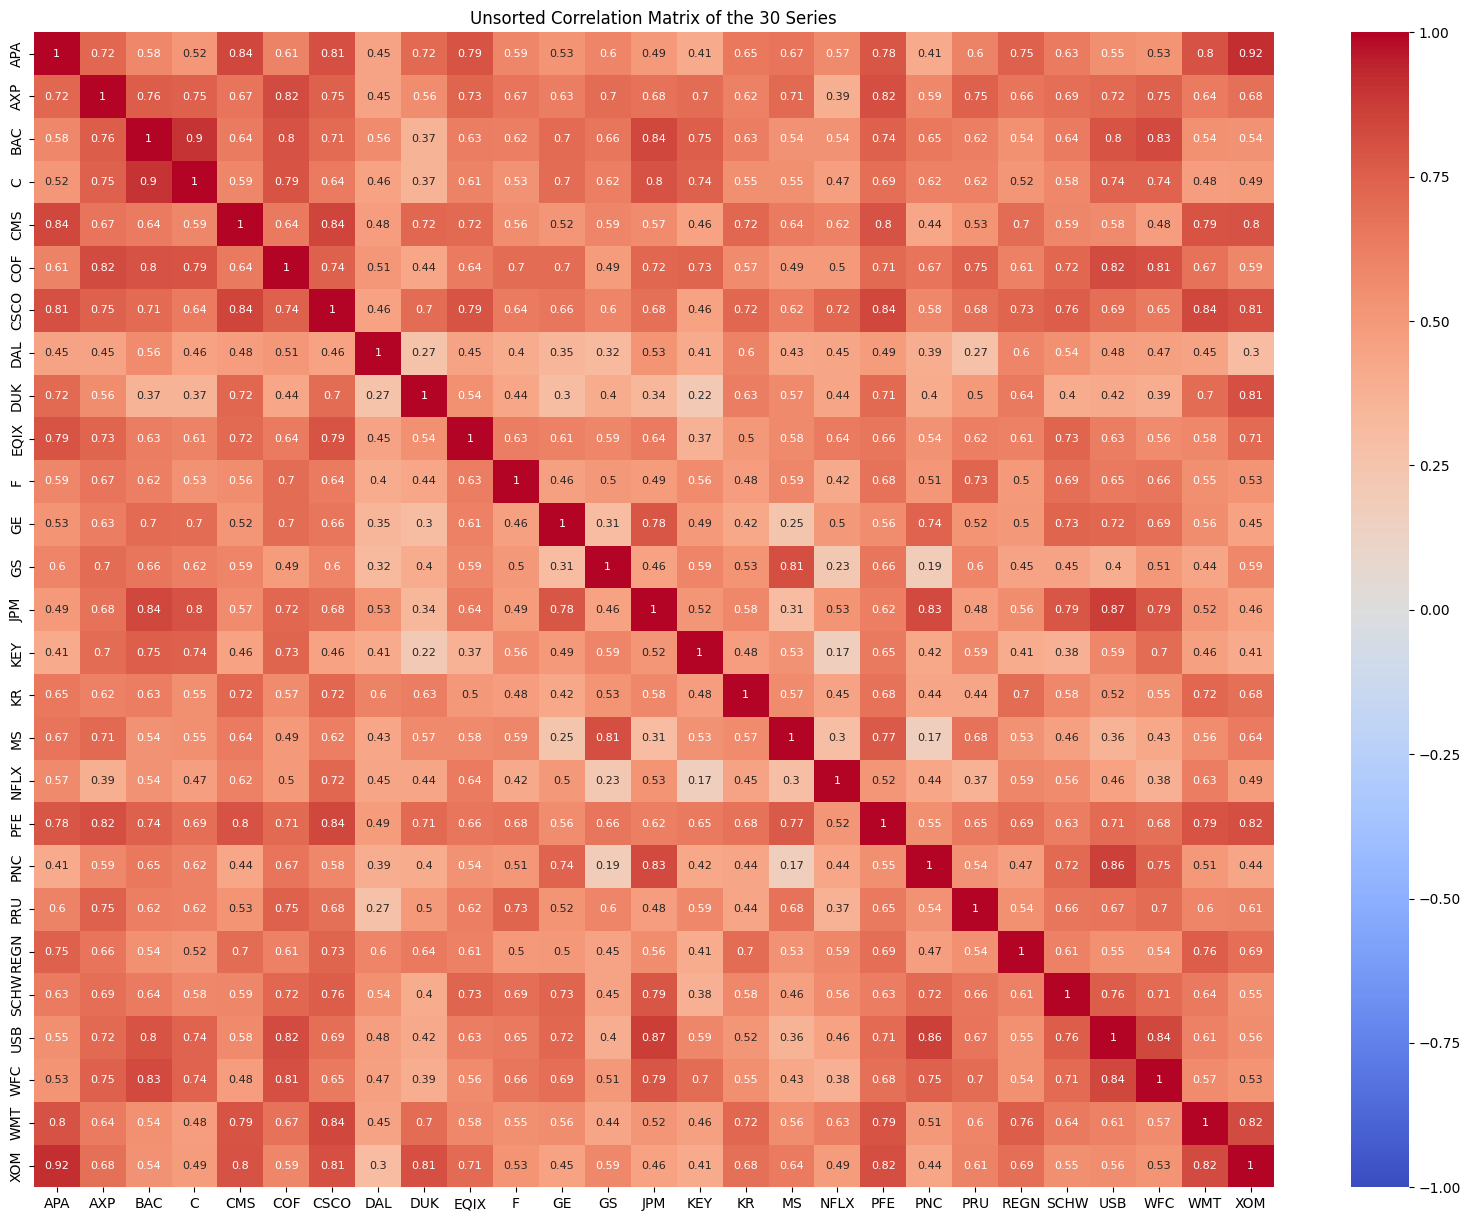

<Figure size 640x480 with 0 Axes>

In [ ]:
corr_co = returns.corr() #returns correlation

# Plot the correlation heatmap
plt.figure(figsize=(20, 15))
seaborn.heatmap(corr_co, vmin=-1, annot=True, cmap="coolwarm", annot_kws={'size': 8})
plt.title('Unsorted Correlation Matrix of the 30 Series')
plt.figure()

**Sorting the correlations**

-At this step we need to ensure that closer correlations are near each other. The chosen criteria to sort the stocks is as follows:

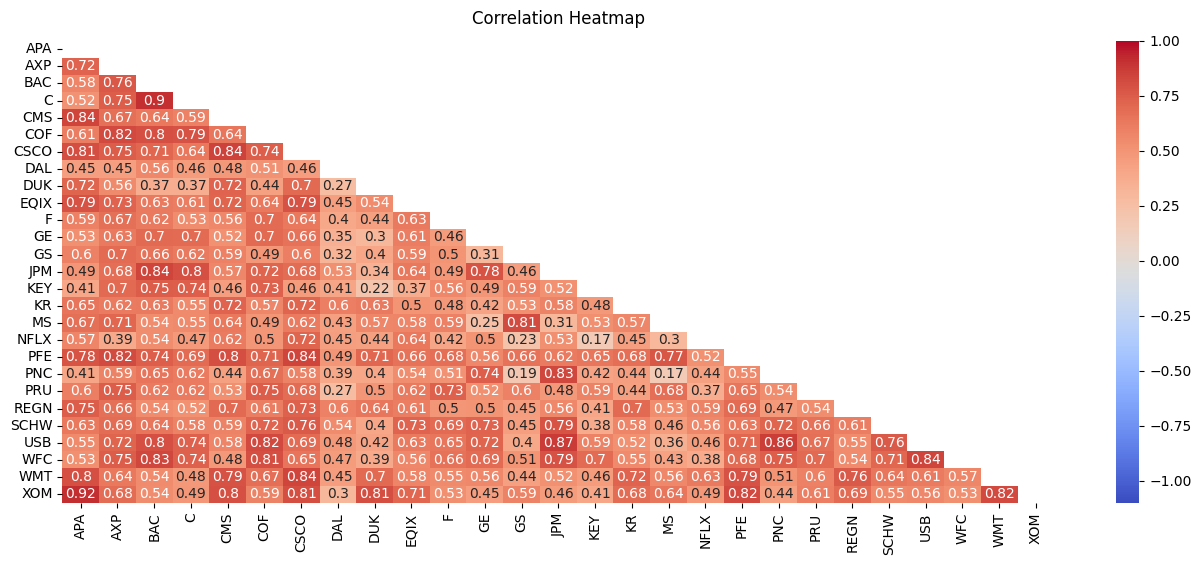

In [ ]:
plt.figure(figsize=(16,6))
mask = np.triu(np.ones_like(corr_co))

heatmap = sns.heatmap(corr_co, mask=mask, vmin=1, vmax=-1, cmap='coolwarm', annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

Cluster map will make hierarchical clustering according to pair wise correlation in stock returns

<Figure size 1600x1600 with 0 Axes>

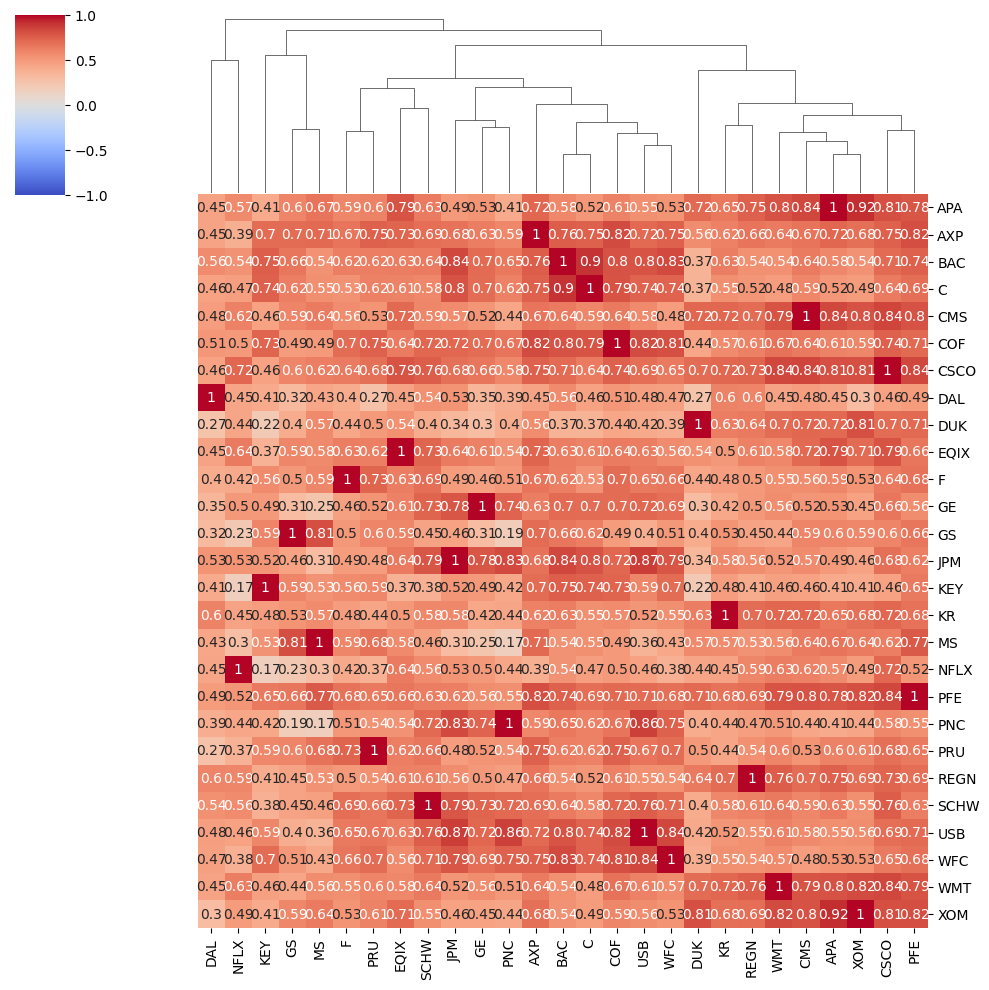

In [ ]:
plt.figure(figsize=(16,16))
mask = np.triu(np.ones_like(corr_co))

heatmap = sns.clustermap(corr_co, row_cluster=False, vmin=-1, vmax=1, cmap='coolwarm', annot=True);